In [1]:
!wget http://www.lawrence.edu/fast/greggj/CMSC490/Signs.zip
!wget http://www.lawrence.edu/fast/greggj/CMSC490/Signs_Test.zip
!unzip Signs.zip
!unzip Signs_Test.zip

URL transformed to HTTPS due to an HSTS policy
--2023-10-04 10:11:39--  https://www.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www.lawrence.edu (www.lawrence.edu)... 143.44.124.14
Connecting to www.lawrence.edu (www.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www7.lawrence.edu/fast/greggj/CMSC490/Signs.zip [following]


--2023-10-04 10:11:39--  https://www7.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www7.lawrence.edu (www7.lawrence.edu)... 143.44.124.14
Connecting to www7.lawrence.edu (www7.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.lawrence.edu/fast/greggj/CMSC490/Signs.zip [following]
--2023-10-04 10:11:39--  https://www2.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www2.lawrence.edu (www2.lawrence.edu)... 143.44.124.14
Connecting to www2.lawrence.edu (www2.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www2.lawrence.edu/fast/GREGGJ/CMSC490/Signs.zip [following]
--2023-10-04 10:11:39--  http://www2.lawrence.edu/fast/GREGGJ/CMSC490/Signs.zip
Connecting to www2.lawrence.edu (www2.lawrence.edu)|143.44.124.14|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244003877 (233M) [application/zip]
Savin

In [2]:
!ls

diabetes.csv	diabetes.csv.3	diabetes.csv.6	Signs_Test.zip	Test
diabetes.csv.1	diabetes.csv.4	diabetes.csv.7	Signs.zip
diabetes.csv.2	diabetes.csv.5	Signs		snap


In [3]:
import os, shutil, pathlib,random
original_dir = pathlib.Path("Test")
new_base_dir_test = pathlib.Path("test")
new_base_dir_validation = pathlib.Path("validation")

#At first go through each of the 42 files
for i in range(43):
    #get a list of names of all images in each file
    images = os.listdir(original_dir/str(i))
    #shuffle the images
    random.shuffle(images)
    #make new directories 
    os.makedirs(new_base_dir_test/str(i))
    os.makedirs(new_base_dir_validation/str(i))
    #copy half of the images to new test
    for image in images[0:len(images)//2]:
        shutil.copyfile(src= original_dir/str(i)/ image,
                        dst= new_base_dir_test/str(i)/image)
    #copy other half to new validation
    for image in images[(len(images)+1)//2:]:
        shutil.copyfile(src= original_dir/str(i)/image,
                        dst= new_base_dir_validation/str(i)/image)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(43, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory
base_dir_train = pathlib.Path("Signs")

train_dataset = image_dataset_from_directory(
    base_dir_train,
    image_size=(180, 180),
    batch_size=32,
    label_mode = "categorical"
    )
validation_dataset = image_dataset_from_directory(
    new_base_dir_validation,
    image_size=(180, 180),
    batch_size=32,
    label_mode = "categorical")
test_dataset = image_dataset_from_directory(
    new_base_dir_test,
    image_size=(180, 180),
    batch_size=32,
    label_mode = "categorical")

Found 39209 files belonging to 43 classes.
Found 6315 files belonging to 43 classes.
Found 6315 files belonging to 43 classes.


In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.mdl",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20


1226/1226 [==============================] - ETA: 0s - loss: 0.5463 - accuracy: 0.8464INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


1226/1226 [==============================] - 24s 19ms/step - loss: 0.5463 - accuracy: 0.8464 - val_loss: 0.3894 - val_accuracy: 0.9300
Epoch 2/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0661 - accuracy: 0.9828 - val_loss: 0.4103 - val_accuracy: 0.9389
Epoch 3/20
1225/1226 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.9879INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


1226/1226 [==============================] - 23s 18ms/step - loss: 0.0419 - accuracy: 0.9879 - val_loss: 0.3690 - val_accuracy: 0.9439
Epoch 4/20
1225/1226 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9909INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


1226/1226 [==============================] - 23s 18ms/step - loss: 0.0321 - accuracy: 0.9909 - val_loss: 0.2767 - val_accuracy: 0.9525
Epoch 5/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.3562 - val_accuracy: 0.9538
Epoch 6/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.3826 - val_accuracy: 0.9441
Epoch 7/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.4054 - val_accuracy: 0.9591
Epoch 8/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.4669 - val_accuracy: 0.9425
Epoch 9/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.4278 - val_accuracy: 0.9519
Epoch 10/20
1226/1226 [==============================] - 22s 18ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.4865 - val_accur

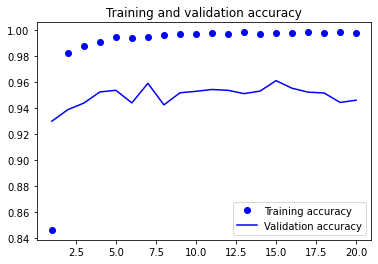

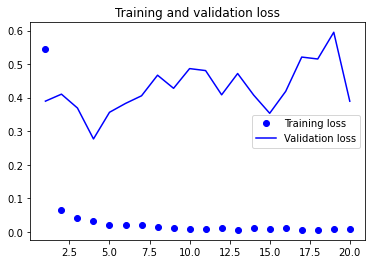

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
test_model = keras.models.load_model("convnet_from_scratch.mdl")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

198/198 [==============================] - 2s 10ms/step - loss: 0.2647 - accuracy: 0.9552
Test accuracy: 0.955
